# Análisis del catálogo de sismos del Servicio Sismológico Nacional de México.

### En el presente archivo ipynbs se realiza la limpieza de los datos puestos al público por el SSNMX. 

<b>Fuente:</b>  
México. Universidad Nacional Autónoma de México, I. d. G., Servicio Sismológico Nacional. (2024).  Catálogo de sismos. Extraído de http://www2.ssn.unam.mx:8080/catalogo/

El dataset cuenta con todos los eventos registrados entre 1901-03-05 y 2024-09-30.



### 1. Preeliminares

In [1]:
# Se importa lo necesario:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Función estilo de gráficas
def grafica_estilo (tit, labx, laby):
    """
    tit: Título de la gráfica
    labx: Título eje x
    laby: Título eje y
    """
    plt.figure()
    plt.style.use('ggplot')
    plt.title(tit)
    plt.xlabel(labx)
    plt.ylabel(laby)

# Colores:
F1 ='#00202e'; c1 = '#cb7f07'
F2 ='#291907'; c2 = '#4a9396'
F3 ='#882380'; c3 = '#4C8D26'
F4 ='#223C20'; c4 = '#DE60CA'

### 2. Exploración de los datos

El archivo tiene 4 filas de encabezado, los registros con valores NAN corresponden al pie del archivo y al menos una de las columnas está compuesta por datos tanto de tipo float como str, por lo que se carga todo como str.

In [3]:
# Se cargan los datos 
df = pd.read_csv('SSNMX.csv', skiprows=4, dtype='str')
df = df.dropna()

In [4]:
# Vista previa de los datos
df.tail()

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus
318533,2024-09-29,22:18:09,1.6,23.02,-109.72,6.5,"5 km al SUROESTE de SAN JOSE DEL CABO, BCS",2024-09-29,16:18:09,verificado
318534,2024-09-29,22:27:46,1.7,23.02,-109.76,11.4,"7 km al SUROESTE de SAN JOSE DEL CABO, BCS",2024-09-29,16:27:46,verificado
318535,2024-09-29,22:38:12,3.2,31.4,-115.48,4.8,"74 km al NOROESTE de SAN FELIPE, BC",2024-09-29,16:38:12,verificado
318536,2024-09-29,22:58:17,1.8,23.01,-109.74,11.5,"6 km al SUROESTE de SAN JOSE DEL CABO, BCS",2024-09-29,16:58:17,verificado
318537,2024-09-30,02:22:21,4.0,14.58,-93.13,25.4,"94 km al SUROESTE de HUIXTLA, CHIS",2024-09-29,20:22:21,verificado


Se intentan convertir a float los datos numéricos. Solo se consigue con la latitud y la longitud. Se hace creando una copia del dataframe para no cargar repetidamente los datos:

In [5]:
df_aux = df.astype({'Latitud':float,'Longitud':float})
df_aux.dtypes

Fecha UTC                      object
Hora UTC                       object
Magnitud                       object
Latitud                       float64
Longitud                      float64
Profundidad                    object
Referencia de localizacion     object
Fecha local                    object
Hora local                     object
Estatus                        object
dtype: object

La magnitud y la profundidad cuenta con valores no numéricos:

In [6]:
df_aux[df_aux['Magnitud'].str.contains('[^\d.-]')].groupby('Magnitud')['Latitud'].count()

Magnitud
no calculable    17649
Name: Latitud, dtype: int64

In [7]:
df_aux[df_aux['Profundidad'].str.contains('[^\d.-]')].groupby('Profundidad')['Latitud'].count()

Profundidad
en revision    10
menos de 1     82
Name: Latitud, dtype: int64

Hay que obtener valores numéricos para las magnitudes 'no calculadas' y para las profundidades 'en revisión'. 

En el caso de las profundidades con 'menos de 1' consideraremos el peor de los casos (profundidad = 1):


In [8]:
df_aux['Profundidad'].replace('menos de 1', '1', inplace=True) 

Para saber como proceder visualizamos los datos que si cuentan con valores numéricos de profundidad y magnitud. Para esto, se obtienen:

In [9]:
# indices de magnitudes y profundidades no numericas
i_mag = df_aux[df_aux['Magnitud'].str.contains('[^\d.-]')].index
i_prof = df_aux[df_aux['Profundidad'].str.contains('[^\d.-]')].index

# Se quitan las magnitudes y profundidades no numéricas
df_mag_num = df_aux.drop(i_mag)[['Latitud', 'Longitud', 'Magnitud']].astype(float)
df_prof_num = df_aux.drop(i_prof)[['Latitud', 'Longitud', 'Profundidad']].astype(float)

Se obtienen los promedios generales de la magnitud y la profundidad: 

In [10]:
mag_mean_gen = df_mag_num['Magnitud'].mean()
prof_mean_gen = df_prof_num['Profundidad'].mean()

mag_mean_gen, prof_mean_gen

(3.6110043903233424, 32.21187493721117)

### 3. Visualización de datos

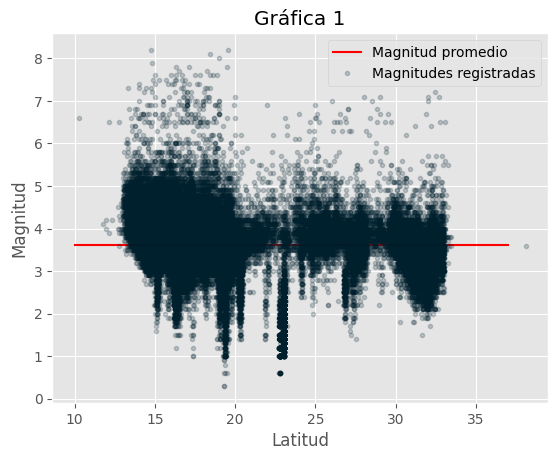

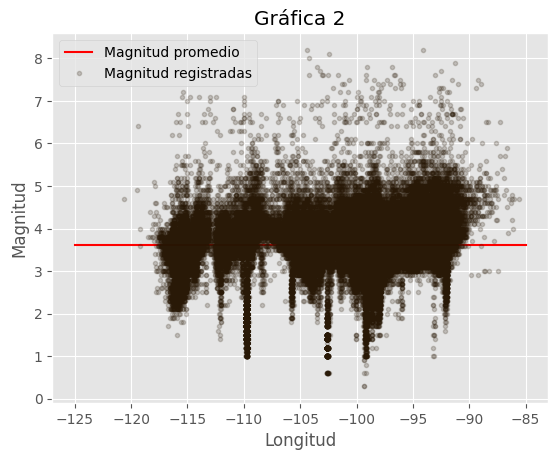

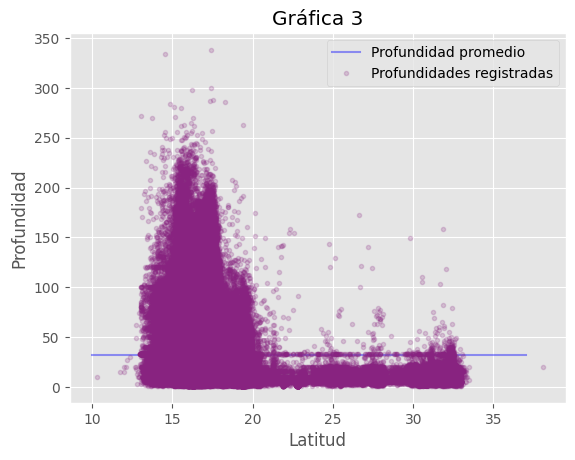

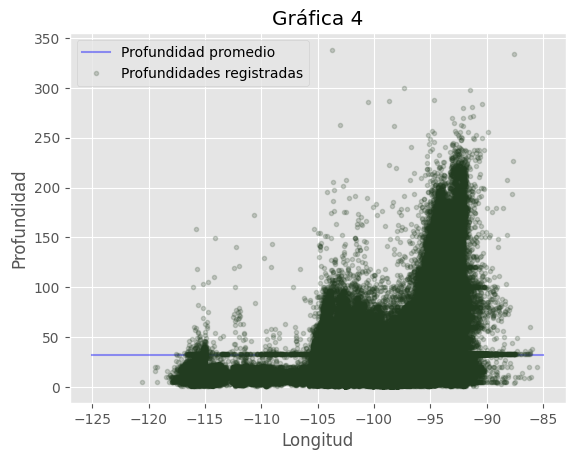

In [11]:
grafica_estilo(tit='Gráfica 1', labx='Latitud', laby='Magnitud') 
plt.plot([10,37],[mag_mean_gen, mag_mean_gen], color='red', label='Magnitud promedio')
plt.errorbar(df_mag_num['Latitud'], df_mag_num['Magnitud'], fmt='.', color=F1, alpha=0.2, label='Magnitudes registradas')
plt.legend() 

grafica_estilo(tit='Gráfica 2', labx='Longitud', laby='Magnitud') 
plt.errorbar(df_mag_num['Longitud'], df_mag_num['Magnitud'], fmt='.', color=F2, alpha=0.2, label='Magnitud registradas') 
plt.plot([-125,-85],[mag_mean_gen, mag_mean_gen], color='red', label='Magnitud promedio')
plt.legend()

grafica_estilo(tit='Gráfica 3', labx='Latitud', laby='Profundidad') 
plt.plot([10,37],[prof_mean_gen, prof_mean_gen], color='b',alpha=0.4, label='Profundidad promedio')     # Comentar esta linea para no ver el promedio
plt.errorbar(df_prof_num['Latitud'], df_prof_num['Profundidad'], fmt='.', color=F3, alpha=0.2, label='Profundidades registradas')
plt.legend() 

grafica_estilo(tit='Gráfica 4', labx='Longitud', laby='Profundidad') 
plt.plot([-125,-85],[prof_mean_gen, prof_mean_gen], color='b', alpha=0.4, label='Profundidad promedio')  # Comentar esta linea para no ver el promedio
plt.errorbar(df_prof_num['Longitud'], df_prof_num['Profundidad'], fmt='.', color=F4, alpha=0.2, label='Profundidades registradas')
plt.legend() 

plt.show()

Se observa en las graficas 4 y 5 que existe un conjunto de Profundidades que forma una línea horizontal muy marcada, y que no parece no encajar con la distribución del resto de datos. Dichos puntos pueden corresponder a datos sin lecturas de profundidad que se aproximaron al promedio del total de los datos (uno puede convencerse de esto último al descomentar las dos líneas de código del bloque anterior, las cuales muestran el promedio). 

Debido a esto dichas profundidades se omitirán y se aproximarán del mismo modo que las profundidades 'en revisión'.

Lo mismo pudo ocurrir con la magnitud, pero en este caso el promedio entra en la zona densa de la distribución de los datos, por lo que es muy probable que al omitir las magnitudes con valores similares a al promedio, quitemos lecturas que genuinamente tuvieron dicho valor, por lo que no se hará tal omisión.

### 4. Filtración de datos

Se quitan las profundidades en una intervalo de 0.1:

In [12]:
i_to_pred = df_prof_num[(df_prof_num['Profundidad']<=(prof_mean_gen+0.8)) & (df_prof_num['Profundidad']>=(prof_mean_gen+0.7))].index
df_to_pred = df_prof_num.drop(i_to_pred)

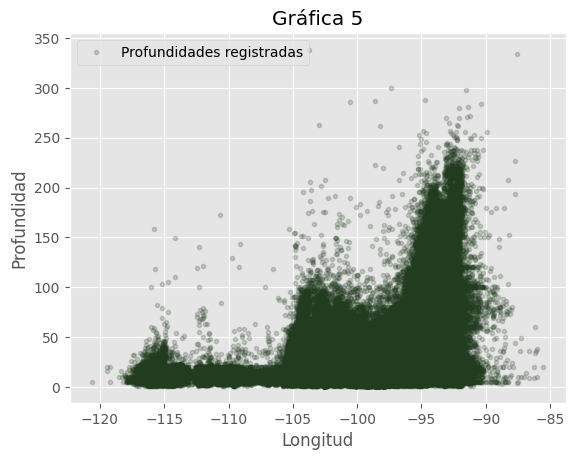

In [13]:
# Visualizacion de profundidades filtradas
grafica_estilo(tit='Gráfica 5', labx='Longitud', laby='Profundidad') 
plt.errorbar(df_to_pred['Longitud'], df_to_pred['Profundidad'], fmt='.', color=F4, alpha=0.2, label='Profundidades registradas')
plt.legend() 

plt.show()

Con los datos filtrados ya podemos aproximar los datos faltantes de magnitud y profundidad.

### 5. Interpolación de datos

Como se ha visto, el promedio general (al menos de la profundidad) no representa el comportamiento de los datos de manera muy realista. Así, para aproximar los datos faltantes recurrimos a los valores del promedio por región de 1 x 1 (unidad de latitud x unidad de longitud), con los cuales realizamos un ajuste de regresión.

Se obtienen los promedios por región 1 x 1:

In [14]:
# Separación en regiones de 1 x 1
df_mag_num[['Latitud','Longitud']] = df_mag_num[['Latitud','Longitud']].round(0)
df_to_pred[['Latitud','Longitud']] = df_to_pred[['Latitud','Longitud']].round(0)

In [15]:
# Obtención del promedio en region de 1 x 1
mag_prom_one = df_mag_num.groupby(['Latitud','Longitud']).mean().reset_index()
prof_prom_one = df_to_pred.groupby(['Latitud','Longitud']).mean().reset_index()

Se hace la regresión. Se hicieron un par de pruebas con los algoritmos de <b> regresión por máquina de vectores de soporte, regresión por árbol de desición y regresión por bosque aleatorio</b> siendo este último el que proporcionó resultados más favorables: 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Variables independientes 
X_mag  = mag_prom_one[['Latitud','Longitud']]
X_prof = prof_prom_one[['Latitud','Longitud']]

# Variables dependientes
y_mag  = mag_prom_one['Magnitud'].astype(float)
y_prof = prof_prom_one['Profundidad'].astype(float)

# Separación en datos de entrenamiento y de prueba
X_mag_en, X_mag_pru, y_mag_en,  y_mag_pru = train_test_split(X_mag, y_mag, test_size=0.2)
X_prof_en, X_prof_pru, y_prof_en,  y_prof_pru = train_test_split(X_prof, y_prof, test_size=0.2) 

# Se crea el objeto con el modelo 
ajuste_mag = RandomForestRegressor(n_estimators=300, max_depth=8)
ajuste_prof = RandomForestRegressor(n_estimators=300, max_depth=10)

# Se hace el ajuste:
ajuste_mag.fit(X_mag_en, y_mag_en)
ajuste_prof.fit(X_prof_en, y_prof_en)

# Se hacen las pruebas
y_mag_pred = ajuste_mag.predict(X_mag_pru)
y_prof_pred = ajuste_prof.predict(X_prof_pru)

# Calidad del ajuste
ajuste_mag.score(X_mag_pru, y_mag_pru), ajuste_prof.score(X_prof_pru, y_prof_pru)

(0.42598715845645563, 0.7406835513945607)

Se observa que la presición del ajuste varía según se elijan los datos de entrenamiento y de prueba. Esto tiene sentido ya que los sismos y por ende cualquier aspecto realcionado con ellos <b>No se pueden predecir</b>.

Finalmente se hacen las aproximaciones:

In [17]:
# Datos para aproximar la magnitud
X_final_mag = df_aux.iloc[i_mag][['Latitud','Longitud']]

# Datos para aproximar la profundidad
X_final_prof = pd.concat([df_aux.iloc[i_to_pred][['Latitud','Longitud']],df_aux.iloc[i_prof][['Latitud','Longitud']]]).sort_index()
i_prof_final = X_final_prof.index 

In [18]:
# Aproximaciones
y_mag_aprox = ajuste_mag.predict(X_final_mag)
y_prof_aprox = ajuste_prof.predict(X_final_prof)

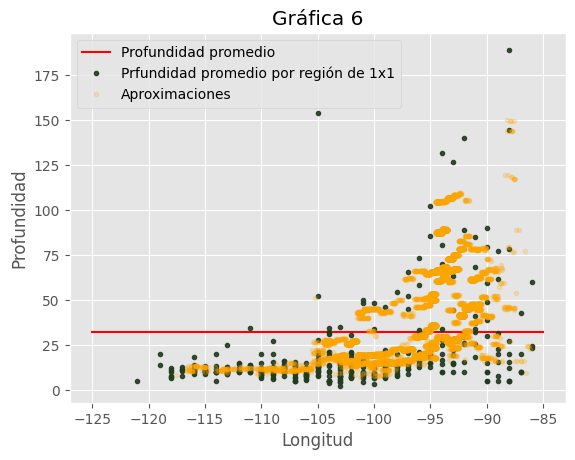

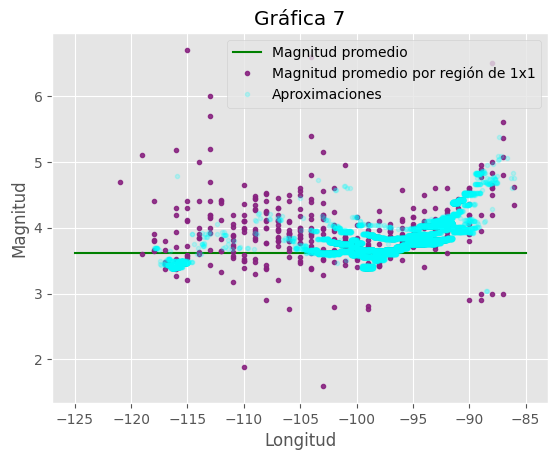

In [19]:
# Visualizacion de profundidades filtradas
grafica_estilo(tit='Gráfica 6', labx='Longitud', laby='Profundidad') 
plt.plot([-125,-85],[prof_mean_gen, prof_mean_gen], color='r', label='Profundidad promedio')
plt.errorbar(X_prof['Longitud'], y_prof, fmt='.', color=F4, alpha=0.9, label='Prfundidad promedio por región de 1x1')
plt.errorbar(X_final_prof['Longitud'], y_prof_aprox, fmt='.', color='orange', alpha=0.2, label='Aproximaciones')
plt.legend() 

grafica_estilo(tit='Gráfica 7', labx='Longitud', laby='Magnitud') 
plt.plot([-125,-85],[mag_mean_gen, mag_mean_gen], color='green', label='Magnitud promedio')
plt.errorbar(X_mag['Longitud'], y_mag, fmt='.', color=F3, alpha=0.9, label='Magnitud promedio por región de 1x1')
plt.errorbar(X_final_mag['Longitud'], y_mag_aprox, fmt='.', color='cyan', alpha=0.2, label='Aproximaciones')
plt.legend() 

 

plt.show()

Las gráficas 6 y 7 muestran que aunque con la regresión no se pueden hacer predicciones, si se pueden aproximar valores que se comportan de manera consistente con la tendencia de los valores promedio por región de 1 x 1, lo cual es ligeramente más realista que solo asignar el promedio general. Así contamos con los datos para completar nuestro dataset.

### 6. Limpieza de los datos

Antes de agregar los datos obtenidos hay que observar que se cuenta con los datos exactos de latitud y longitud, por lo que en la columna <b> Referencia de localización </b> podemos prescindir de la descripción (A tantos km de .....), y conservar solo el estado donde ocurrió el evento:

In [20]:
df_aux['Estado'] = df_aux['Referencia de localizacion'].str.split(',', expand=True)[1]
df_aux['Estado'] = df_aux['Estado'].str.strip()
df_aux.drop('Referencia de localizacion', axis=1, inplace=True)

Hecho esto, podemos agrupar por estado:

In [21]:
df_aux.groupby('Estado')['Magnitud'].count()#.size

Estado
AGS         46
BC       19786
BCS       7767
CAMP        76
CDMX       497
CHIH       712
CHIS     54730
COAH       193
COL       9695
DGO         83
GRO      54173
GTO        115
HGO        911
JAL      11499
MEX        731
MICH     21911
MOR        326
N            3
NAY        330
NL         588
OAX     119145
PUE       1585
QR         105
QRO         19
SIN       1353
SLP        392
SON       2708
TAB        700
TAMS       185
TLAX       144
VER       7440
YUC          6
ZAC        584
Name: Magnitud, dtype: int64

En este caso, aparecen 33 estados distintos, cuando México solo cuenta con 32. Revisando la lista de estados se observan las iniciales N, NAY, NL. México solo cuenta con dos estados que comienzn con N, Nayarit y Nuevo León. De modo que la inicial N corresponde a alguno de estos dos.

Observando los registros N en 'Estado':

In [22]:
df_aux[df_aux['Estado']=='N']

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Fecha local,Hora local,Estatus,Estado
214854,2021-02-06,00:36:19,3.7,25.748,-100.285,5.0,2021-02-05,18:36:19,revisado,N
214864,2021-02-06,03:24:13,3.7,25.748,-100.285,5.0,2021-02-05,21:24:13,revisado,N
214921,2021-02-06,23:33:52,3.5,25.748,-100.285,5.0,2021-02-06,17:33:52,revisado,N


Con una búsqueda rápida en google maps mediante la latitud y longitud se determina que los eventos sucedieron en Nuevo León.

Cambiamos N por NL:

In [23]:
df_aux.loc[df_aux['Estado']=='N', 'Estado'] = 'NL'
df_aux.groupby('Estado')['Magnitud'].count() 

Estado
AGS         46
BC       19786
BCS       7767
CAMP        76
CDMX       497
CHIH       712
CHIS     54730
COAH       193
COL       9695
DGO         83
GRO      54173
GTO        115
HGO        911
JAL      11499
MEX        731
MICH     21911
MOR        326
NAY        330
NL         591
OAX     119145
PUE       1585
QR         105
QRO         19
SIN       1353
SLP        392
SON       2708
TAB        700
TAMS       185
TLAX       144
VER       7440
YUC          6
ZAC        584
Name: Magnitud, dtype: int64

Finalmente, incorporamos los valores aproximados y convertimos todo a float:

In [24]:
# Magnitudes
df_aux.loc[i_mag, 'Magnitud'] = y_mag_aprox
df_aux.loc[i_prof_final, 'Profundidad'] = y_prof_aprox

df_aux = df_aux.astype({'Magnitud':float, 'Profundidad':float})
df_aux.dtypes

Fecha UTC       object
Hora UTC        object
Magnitud       float64
Latitud        float64
Longitud       float64
Profundidad    float64
Fecha local     object
Hora local      object
Estatus         object
Estado          object
dtype: object

Visualización datos finales:

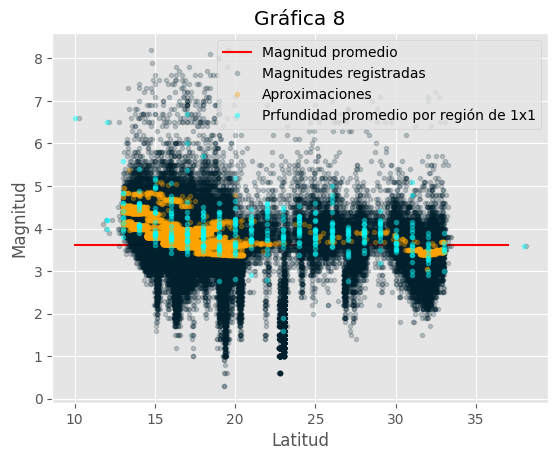

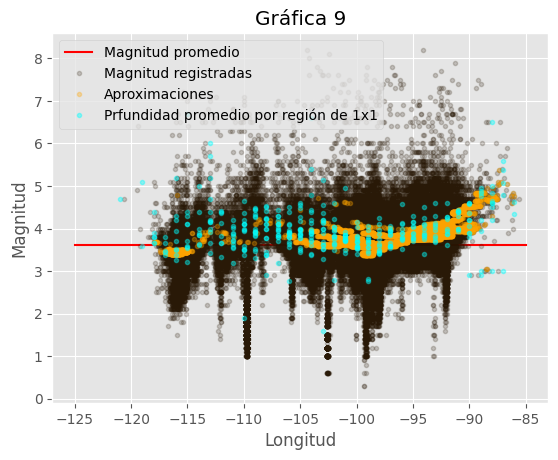

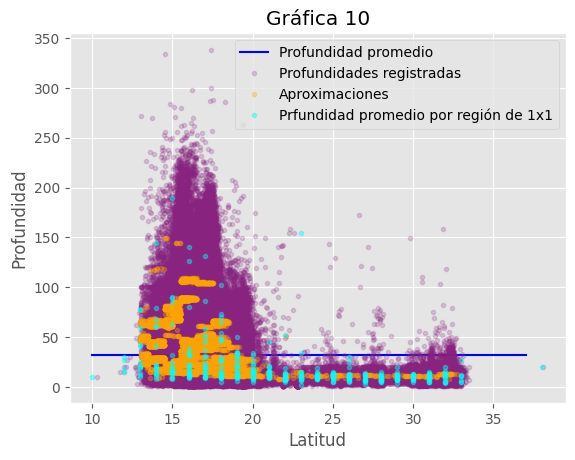

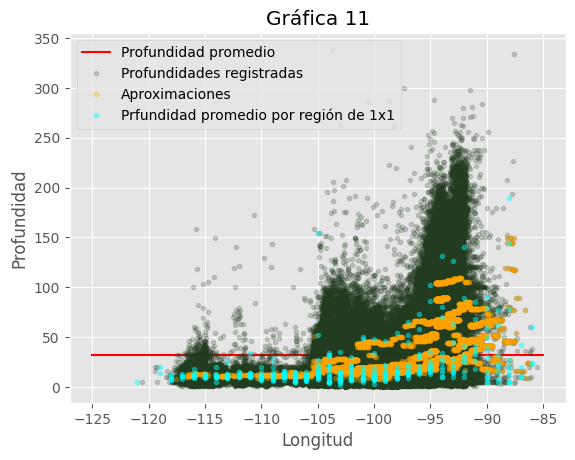

In [25]:
grafica_estilo(tit='Gráfica 8', labx='Latitud', laby='Magnitud') 
plt.errorbar(df_aux['Latitud'], df_aux['Magnitud'], fmt='.', color=F1, alpha=0.2, label='Magnitudes registradas')
plt.errorbar(X_final_mag['Latitud'], y_mag_aprox, fmt='.', color='orange', alpha=0.3, label='Aproximaciones')
plt.plot([10,37],[mag_mean_gen, mag_mean_gen], color='red', label='Magnitud promedio')
plt.errorbar(X_mag['Latitud'], y_mag, fmt='.', color='Cyan', alpha=0.4, label='Prfundidad promedio por región de 1x1')
plt.legend() 

grafica_estilo(tit='Gráfica 9', labx='Longitud', laby='Magnitud') 
plt.errorbar(df_aux['Longitud'], df_aux['Magnitud'], fmt='.', color=F2, alpha=0.2, label='Magnitud registradas') 
plt.plot([-125,-85],[mag_mean_gen, mag_mean_gen], color='red', label='Magnitud promedio')
plt.errorbar(X_final_mag['Longitud'], y_mag_aprox, fmt='.', color='orange', alpha=0.3, label='Aproximaciones')
plt.errorbar(X_mag['Longitud'], y_mag, fmt='.', color='Cyan', alpha=0.4, label='Prfundidad promedio por región de 1x1')
plt.legend()

grafica_estilo(tit='Gráfica 10', labx='Latitud', laby='Profundidad') 
plt.plot([10,37],[prof_mean_gen, prof_mean_gen], color='b', label='Profundidad promedio')     # Comentar esta linea para no ver el promedio
plt.errorbar(df_aux['Latitud'], df_aux['Profundidad'], fmt='.', color=F3, alpha=0.2, label='Profundidades registradas')
plt.errorbar(X_final_prof['Latitud'], y_prof_aprox, fmt='.', color='orange', alpha=0.3, label='Aproximaciones')
plt.errorbar(X_prof['Latitud'], y_prof, fmt='.', color='Cyan', alpha=0.4, label='Prfundidad promedio por región de 1x1')
plt.legend() 

grafica_estilo(tit='Gráfica 11', labx='Longitud', laby='Profundidad') 
plt.plot([-125,-85],[prof_mean_gen, prof_mean_gen], color='r', label='Profundidad promedio')  # Comentar esta linea para no ver el promedio
plt.errorbar(df_aux['Longitud'], df_aux['Profundidad'], fmt='.', color=F4, alpha=0.2, label='Profundidades registradas')
plt.errorbar(X_final_prof['Longitud'], y_prof_aprox, fmt='.', color='orange', alpha=0.3, label='Aproximaciones')
plt.errorbar(X_prof['Longitud'], y_prof, fmt='.', color='Cyan', alpha=0.4, label='Prfundidad promedio por región de 1x1')
plt.legend() 

plt.show()

Finalmente guardamos los datos límpios:

In [26]:
#df_aux.to_csv('SSNM_Limpios.csv')